# MSE and Cross Entropy

In [1]:
import numpy as np

In [9]:
y = np.array([0.1,  0.04,  0.6,  0,  0.1])
t = np.array([0,    1,     0,    0,    0])

In [10]:
print(y)
print(t)

[0.1  0.04 0.6  0.   0.1 ]
[0 1 0 0 0]


In [11]:
np.sum((y - t)**2)/5

0.26032

In [13]:
y = np.array([0.1,  0.8,  0.02,  0,  0.1])
t = np.array([0,    1,     0,    0,    0])

In [14]:
np.sum((y - t)**2)/5

0.012079999999999997

In [15]:
y.size

5

In [28]:
def mean_squared_error(y, t):
    return (np.sum((y - t)**2))/y.size

In [29]:
def mean_absolute_error(y, t):
        return (np.sum(np.abs(y - t)))/y.size

In [18]:
y1 = np.array([0.1,  0.04,  0.6,  0,  0.1])
y2 = np.array([0.1,  0.8,  0.02,  0,  0.1])
t = np.array([0,    1,     0,    0,    0])

In [30]:
mean_squared_error(y1, t)

0.26032

In [31]:
mean_squared_error(y2, t)

0.012079999999999997

## Cross Entropy

In [34]:
def cross_entropy_error(y, t):
    return -np.sum(t * np.log(y + 1e-7))

In [35]:
cross_entropy_error(y1, t)

3.2188733248713257

In [36]:
cross_entropy_error(y2, t)

0.22314342631421757

In [40]:
print(y)
print(y.ndim)

[0.1  0.8  0.02 0.   0.1 ]
1


In [42]:
y.shape[0]

5

In [46]:
y.shape

(5,)

In [47]:
z = y.reshape(1, y.size)
z.shape

(1, 5)

### Cross entroy function for mini-batch

In [53]:
y1b = np.array([ [0.1,  0.04,  0.6,  0,  0.1], [0.1,  0.4,  0.2,  0,  0.1], [0.1,  0.12,  0.1,  0.5,  0.1] ])
y2b = np.array([ [0.1,  0.7,  0.12,  0,  0.1], [0.1,  0.8,  0.2,  0,  0.1], [0.1,  0.5,  0.1,  0.123,  0.1] ])

In [51]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0] 
    return -np.sum(t * np.log(y + 1e-7))/batch_size

In [52]:
cross_entropy_error(y1b, t)

2.0851421698708723

In [54]:
cross_entropy_error(y2b, t)

0.42432173598526096

In [55]:
cross_entropy_error(y1, t)

3.2188733248713257

## Numerical differentiation

In [56]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [57]:
def fun1(x):
    return x**2 + 0.1*x

In [58]:
import matplotlib.pyplot as plt

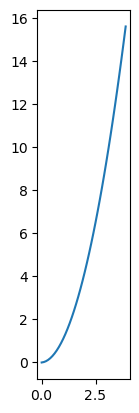

In [62]:
x = np.arange(0.0, 4, 0.1)
y = fun1(x)
plt.plot(x, y)
plt.axis('scaled')
plt.show()

In [65]:
print(numerical_diff(fun1, 0.2))
print(numerical_diff(fun1, 0.4))

0.49999999999994493
0.9000000000000674


## Partial derivatives

In [67]:
def fun2(x):
    return x[0]**2 + x[1]**2

In [68]:
def fun2_1(x1, x2):
    return x1**2 + x2**2    

In [76]:
# partial derivative at x2 = 4
def fun2_part1(x1):
    return 2*x1 + 2*4

In [77]:
# partial derivative at x1 = 3
def fun2_part2(x2):
    return 2*3 + 2*x2

In [78]:
numerical_diff(fun2_part1, 3)

1.9999999999953388

In [79]:
numerical_diff(fun2_part2, 4)

1.9999999999953388

In [86]:
3 + 1e-4

3.0001

In [2]:
import numpy as np

In [3]:
def _numerical_gradient(f, x):
    h = 1e-4

    grad = np.zeros_like(x) 

    for idx in range(x.size):
        # save x[idx]
        tmp = x[idx]

        # for f(x + h)
        x[idx] = tmp + h
        fh1 = f(x)

        # for f(x - h)
        x[idx] = tmp - h
        fh2 = f(x)

        grad[idx] = (fh1 - fh2)/(2*h)
        # restore x[idx]
        x[idx] = tmp

    return grad

In [99]:
_numerical_gradient(fun2, np.array([3.0, 4.0]))

array([6., 8.])

In [100]:
_numerical_gradient(fun2, np.array([0.0, 2.0]))

array([0., 4.])

In [49]:
# works with mini-batch as well
def numerical_gradient(f, x):
    if x.ndim == 1:
        return _numerical_gradient(f, x)
    else:
        grad = np.zeros_like(x)
        for idx, x in enumerate(x):
            grad[idx] = _numerical_gradient(f, x)

        return grad

In [1]:
# x is an np array 
# x1^2 + x2^2

def fun2(x):
    return x[0]**2 + x[1]**2
    

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=300):
    x = init_x

    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad

    return x

In [18]:
init_x = np.array([-3.0, 5.0])

In [26]:
gradient_descent(fun2, init_x, lr=0.0001)

array([ 4.80603344e+12, -9.68668503e+12])

In [35]:
import numpy as np

class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    def predict(self, x):
        return np.dot(x, self.w)


    def softmax(self, a):
        c = np.max(a)
        a = np.exp(a - c)
        s = np.sum(a)
    
        return a/s 


    def cross_entropy_error(self, y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        batch_size = y.shape[0] 
        return -np.sum(t * np.log(y + 1e-7))/batch_size


    def loss(self, x, t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y, t)

In [36]:
net = SimpleNet()

In [37]:
net.w

array([[-1.8870696 , -0.90016528, -1.70771816],
       [-0.6574631 , -0.00693785,  1.39864672]])

In [45]:
x = np.array([0.6, 0.7])
t = np.array([1.0, 0.0, 0.0])

p = net.predict(x)
print(p)

[-1.59246593 -0.54495567 -0.0455782 ]


In [46]:
net.loss(x, t)

2.1456233388286865

In [41]:
np.argmax(p)

2

In [52]:
def fun_test(w):
    return net.loss(x, t)

dw = numerical_gradient(fun_test, net.w)
print(dw)

[[-0.52980256  0.20009953  0.32970303]
 [-0.61810298  0.23344945  0.38465353]]


## TwoLayerNet

In [55]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))


def softmax(a):
    c = np.max(a)
    a = np.exp(a - c)
    s = np.sum(a)

    return a/s 

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0] 
    return -np.sum(t * np.log(y + 1e-7))/batch_size

def _numerical_gradient(f, x):
    h = 1e-4

    grad = np.zeros_like(x) 

    for idx in range(x.size):
        # save x[idx]
        tmp = x[idx]

        # for f(x + h)
        x[idx] = tmp + h
        fh1 = f(x)

        # for f(x - h)
        x[idx] = tmp - h
        fh2 = f(x)

        grad[idx] = (fh1 - fh2)/(2*h)
        # restore x[idx]
        x[idx] = tmp

    return grad

# works with mini-batch as well
def numerical_gradient(f, x):
    if x.ndim == 1:
        return _numerical_gradient(f, x)
    else:
        grad = np.zeros_like(x)
        for idx, x in enumerate(x):
            grad[idx] = _numerical_gradient(f, x)

        return grad

In [56]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)



    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, w1) + b1
        z1 = sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        y = softmax(a2)

        return y

        
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    

    def numerical_gradient(self, x, t):
        loss_w = lambda w: self.loss(x, t)
        grads = {}
        grads['w1'] = numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = numerical_gradient(loss_w, self.params['b2'])

        return grads




In [57]:
input_size = 28*28 # 784
net = TwoLayerNet(input_size=input_size, hidden_size=100, output_size=10)


In [67]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

g = net.numerical_gradient(x, t)


In [68]:
g

{'w1': array([[ 7.87006371e-05,  1.40670764e-05, -1.33957379e-04, ...,
          2.23477947e-04,  6.69482247e-05,  1.24709096e-04],
        [ 7.65994557e-05,  1.39161820e-04, -1.34329454e-04, ...,
          2.88309927e-04, -4.23102975e-05, -8.79665052e-05],
        [ 1.83594331e-04,  5.86721427e-05, -7.14300796e-05, ...,
          2.33155859e-04,  3.59331409e-05,  7.65318475e-06],
        ...,
        [ 2.40135520e-04, -3.78972587e-05, -1.47270320e-04, ...,
          1.99010017e-04, -5.07480280e-05,  5.54969759e-05],
        [-6.11241191e-05,  4.98168262e-05, -9.31372313e-05, ...,
          3.68392676e-04,  1.55442663e-04,  4.98192776e-05],
        [ 2.08788720e-04,  1.17665095e-04, -7.53012230e-05, ...,
          2.19543317e-04, -3.64200403e-05, -7.26227967e-06]]),
 'b1': array([ 1.92577403e-04,  1.09733627e-04, -2.31871802e-04,  1.29617952e-04,
        -1.96194243e-04, -2.73089960e-04, -1.58896789e-04,  2.13109104e-04,
        -9.05755115e-05,  2.63242406e-04,  1.86355464e-04, -2.279

### Mini-Batch Training

In [29]:
from mnist_data import MnistData

In [30]:
mnist_data = MnistData()
(x_train, t_train), (x_test, t_test) = mnist_data.load()

Done with loading images:  train-images-idx3-ubyte.gz
Done with loading labels:  train-labels-idx1-ubyte.gz
Done with loading images:  t10k-images-idx3-ubyte.gz
Done with loading labels:  t10k-labels-idx1-ubyte.gz


In [31]:
x_train.shape

(60000, 784)

In [73]:
x_t = np.random.rand(100)
batch_mask = np.random.choice(100, 5)
print(batch_mask)
x_t[batch_mask]

[70 86  0 21 71]


array([0.04451108, 0.07528287, 0.54161293, 0.91528426, 0.41196233])

In [74]:
x_t[70]

0.04451107856045655

In [ ]:
# hyper parameters
iters_num = 10000 
train_size = x_train.shape[0]
batch_size = 64
learning_rate = 0.01

train_loss = []

input_size = 28*28 # 784
net = TwoLayerNet(input_size=input_size, hidden_size=100, output_size=10)

for i in range(iters_num):
    # mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = net.numerical_gradient(x_batch, t_batch)
    for key in ('w1', 'b1', 'w2', 'b2'):
        net.params[key] -= learning_rate*grad[key]

loss = net.loss(x_batch, t_batch)
train_loss.append(loss)